In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read data dari file csv dan simpan dalam variabel df

In [2]:
df = pd.read_csv("Data/steam_reviews.csv")
df.head(10)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
5,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
6,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
7,7,292030,The Witcher 3: Wild Hunt,85183602,turkish,.\n,1611378312,1611378312,True,0,...,True,False,False,76561199084188849,9,1,2701.0,0.0,2701.0,1.609671e+09
8,8,292030,The Witcher 3: Wild Hunt,85183227,schinese,年度最佳的作品，没啥好夸的，神作,1611377703,1611377703,True,0,...,True,False,False,76561198130808993,581,17,6921.0,222.0,6921.0,1.611317e+09
9,9,292030,The Witcher 3: Wild Hunt,85182785,spanish,great game,1611377005,1611377005,True,0,...,True,False,False,76561198301724112,38,5,2399.0,333.0,2364.0,1.611379e+09


### Eksplorasi kolom-kolom yang ada dalam dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21747371 entries, 0 to 21747370
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned   

### Cek bahasa apa saja yang ada dalam dataframe

In [4]:
df['language'].unique()
df['language'].value_counts()

language
english       9635437
schinese      3764967
russian       2348900
brazilian      837524
spanish        813320
german         752596
turkish        635868
koreana        613632
french         541751
polish         495529
tchinese       218203
czech          133980
italian        133307
thai           127503
japanese        81754
portuguese      81386
swedish         80226
dutch           77555
hungarian       71001
latam           70103
danish          55915
finnish         54712
norwegian       36797
romanian        32730
ukrainian       21169
greek           14472
bulgarian       10454
vietnamese       6580
Name: count, dtype: int64

### Gunakan bahasa inggris untuk prediksi ini

In [5]:
df = df[df['language'] == 'english']
df['language'].unique()

array(['english'], dtype=object)

### Ambil kolom yang sesuai dengan tujuan analisis, yaitu kolom review dan recommended (output)

In [6]:
df = df[['review', 'recommended']]
df.head(10)

,review,recommended
3,"One of the best RPG's of all time, worthy of a...",True
5,"good story, good graphics. lots to do.",True
6,"dis gud,",True
18,favorite game of all time cant wait for the Ne...,True
20,Why wouldn't you get this,True
21,it is ok\n,True
22,worth\n,True
24,Isn't Geralt hot enough to get both Yennefer a...,True
25,"Very Fun, Would play again!",True
39,The game is enjoyable enough but...\n-Combat h...,True


### Ubah tipe data review menjadi str

In [7]:
df['review'] = df['review'].astype(str)
df['review'].dtype

dtype('O')

### Lihat distribusi data output

recommended
True     8584444
False    1050993
Name: count, dtype: int64


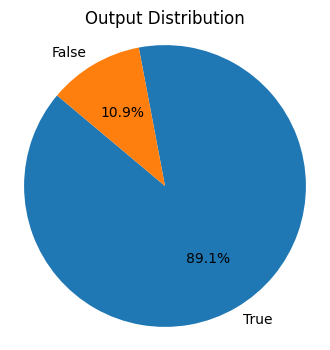

In [8]:
output_count = df['recommended'].value_counts()
print(output_count)

plt.figure(figsize=(4, 4))
plt.pie(output_count, labels=output_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Output Distribution')
plt.axis('equal') 
plt.show()

### Export dataframe ke file csv

Dataframe untuk data yang merekomendasikan game

In [11]:
recommended_df = df[df['recommended'] == True]['review']
recommended_df.to_csv('Data/steam_reviews_recommended.csv', index=False)

Dataframe untuk data yang tidak merekomendasikan game

In [12]:
not_recommended_df = df[df['recommended'] == False]['review']
not_recommended_df.to_csv('Data/steam_reviews_not_recommended.csv', index=False)

### Buat function word count

In [13]:
def wc(df):
    word_counts = {}

    # Iterate through each row in the 'review' column
    for row in df:
        # Check if the value is a string
        # if isinstance(row, str):
        row = row.lower()

        # Filter sentence so that there is no character other than alphabet, number, and space
        sentence = ""
        for character in row:
            if character.isalnum() or character.isspace():
                sentence += character

        # Split the text into words
        split_sentence = sentence.split()

        # Update the word counts dictionary
        for word in split_sentence:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

    # Convert the word counts dictionary to a DataFrame
    word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
    return word_counts_df


### Word count untuk data recommended

In [14]:
recommended_df_wc = wc(recommended_df)
recommended_df_wc

,Word,Count
2,the,12657528
40,and,8485012
19,game,8292426
80,a,7499861
14,to,7316796
...,...,...
734061,edsgawg,1
734062,unassumuning,1
734063,httpsyoutubeuzft0b5no,1
734064,ghosthelp,1


Visualisasi dengan bar plot

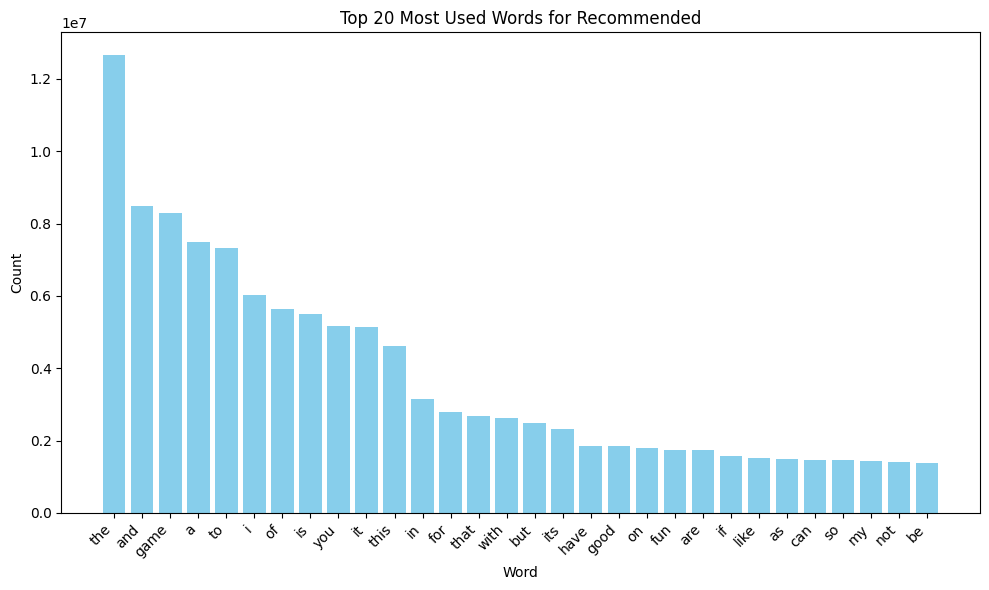

In [15]:
top_words = recommended_df_wc.head(30)
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 20 Most Used Words for Recommended')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Word count untuk data not recommended

In [16]:
not_recommended_df_wc = wc(not_recommended_df)
not_recommended_df_wc

,Word,Count
4,the,3478945
54,to,2161540
27,and,2044271
13,a,1845153
33,game,1806857
...,...,...
274531,theythey,1
274530,zombiesso,1
274528,worldzombiesskill,1
274527,niceopen,1


Visualisasi dengan bar plot

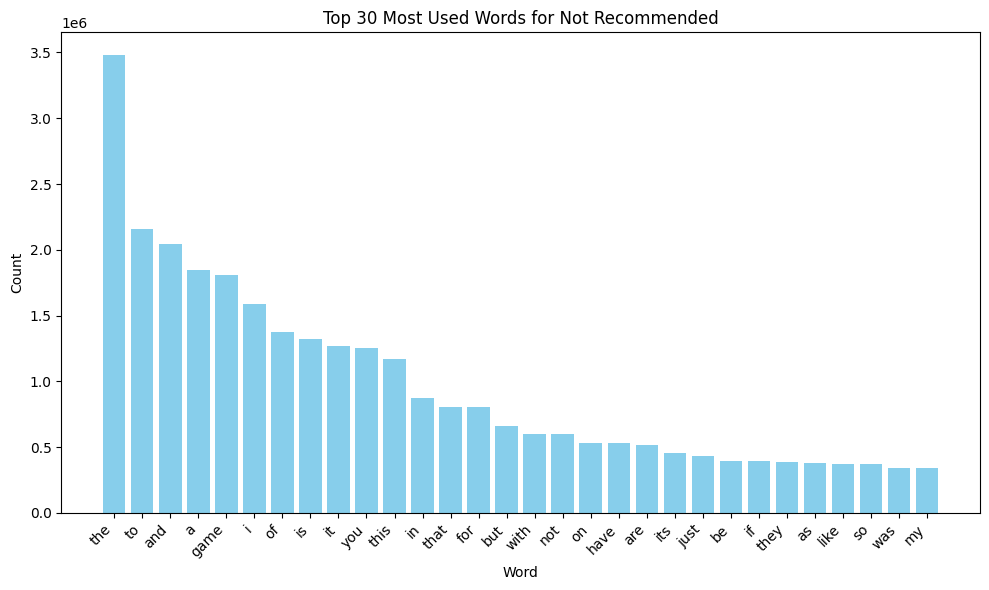

In [17]:
top_words = not_recommended_df_wc.head(30)
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Count'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 30 Most Used Words for Not Recommended')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()